In [1]:
Threads.nthreads()

12

In [2]:
using QuantumDynamics
using Plots
using LinearAlgebra

Hoping to get rid of the units issue by integrating Unitful into QuantumDynamics package.

In [3]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const nm2au = 18.897

18.897

Ordejon paper mentions that Hamiltonian electronic terms are $\epsilon_0$ , $\epsilon_{AA+b}$ and $\epsilon_{AA+2b}$ for nearest 2 neighbours and additionally mentions that the coupling terms for nearest 2 neighbours on either side. Further mentions the couplings $\epsilon$AB, AC, AD for neighbours on the same unit cell. However, the value for $\epsilon_0$ (site energies) isn't mentioned in the paper? Perhaps worth doing some TD-DFT ourselves? Or alternatively some TrESP-ish method for 1-D... have to think about this for a bit

In [4]:
ϵ0 = -5000*mev2invcm # This appears to not change the dynamics at all
ϵb = 134.0
ϵ2b = -10.7

-10.7

In [5]:
N = 12

12

In [6]:
H0 = Matrix{ComplexF64}(zeros(N, N))

12×12 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im

In [7]:
for i in 1:N
    H0[i,i] = ϵ0
    if i <= N-2
        H0[i, i+2] = ϵ2b
    end
    if i <= N-1
        H0[i, i+1] = ϵb
    end
    if i >= 2
        H0[i, i-1] = ϵb
    end
    if i>=3
        H0[i, i-2] = ϵ2b
    end
end

In [8]:
H0 = H0 * invcm2au

12×12 Matrix{ComplexF64}:
   -0.183757+0.0im  0.000610548+0.0im  …          0.0+0.0im
 0.000610548+0.0im    -0.183757+0.0im             0.0+0.0im
 -4.87527e-5+0.0im  0.000610548+0.0im             0.0+0.0im
         0.0+0.0im  -4.87527e-5+0.0im             0.0+0.0im
         0.0+0.0im          0.0+0.0im             0.0+0.0im
         0.0+0.0im          0.0+0.0im  …          0.0+0.0im
         0.0+0.0im          0.0+0.0im             0.0+0.0im
         0.0+0.0im          0.0+0.0im             0.0+0.0im
         0.0+0.0im          0.0+0.0im             0.0+0.0im
         0.0+0.0im          0.0+0.0im     -4.87527e-5+0.0im
         0.0+0.0im          0.0+0.0im  …  0.000610548+0.0im
         0.0+0.0im          0.0+0.0im       -0.183757+0.0im

In [9]:
# ωp = [57.8, 59.6, 89.0, 107.3, 139.1, 639.1, 1011.2, 1344.7, 1593.3] .* invcm2au
# ωpg0p = [-1.7, 1.4, 1.6, -0.14, -2.3, -7.5, -3.6, 19.8, -42.0] * mev2invcm * invcm2au
# #g0p = ωpg0p ./ ωp
# jws = (ωpg0p .^ 2) ./ ωp
# wm = maximum(ωp)
# Jw = fitsd(ωp, jws, wm, 1.0, false)

In [10]:
# ω = 0:0.0001:0.03
# plot(ω, (Jw.(ω)), xlabel="ω", ylabel="J(ω)", title="Spectral Density", legend=false)

In [11]:
svec = Matrix{Float64}(zeros(1, N))
for i in 1:N
    svec[i] = i
end
svec

1×12 Matrix{Float64}:
 1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  11.0  12.0

In [12]:
Jw = SpectralDensities.DrudeLorentz(λ=135*mev2au, γ=150*mev2au, Δs=1.0)

QuantumDynamics.SpectralDensities.DrudeLorentz(0.0049614333003000005, 0.005512703667, 1.0, 5.512703667, false)

In [13]:
nsteps = 10000
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[5, 5] = 1.0

T = 50.0:50.0:500.0

β = 1 / (300 * 3.16683e-6) # T = 300K

1052.5772881188234

Simulation is very sensitive to time-stepping. NaNs get produced if you're not careful

In [14]:
dt = 0.1/au2fs # 1fs

4.134137457575099

In [15]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt=dt, ntimes=nsteps)
@time t, ρs = TTM.propagate(; fbU=fbU,
                            Jw=[Jw],
                            β=β,
                            ρ0=ρ0,
                            dt=dt,
                            ntimes=nsteps,
                            rmax=5,
                            svec=svec,
                            extraargs=QuAPI.QuAPIArgs(),
                            path_integral_routine=QuAPI.build_augmented_propagator)

LoadError: InterruptException:

In [16]:
plot(t.*au2fs, real.(ρs[:, 5, 5]), label="site 5")
plot!(t.*au2fs, real.(ρs[:, 4, 4]), label="site 4")
plot!(t.*au2fs, real.(ρs[:, 3, 3]), label="site 3")
plot!(t.*au2fs, real.(ρs[:, 2, 2]), label="site 2")
plot!(t.*au2fs, real.(ρs[:, 1, 1]), label="site 1")

LoadError: UndefVarError: `t` not defined

In [20]:
MSD = []
for i in 1:50
    s = 0.0
    for j in 1:N
        s += real(ρc[i, j, j])*(j-5)^2
    end
    push!(MSD, s)
end

LoadError: UndefVarError: `ρc` not defined

In [ ]:
display("text/plain", MSD)

In [17]:
# HEOM

λs = repeat([135.0], N) * mev2au
γs = repeat([150.0], N) * mev2au
JwH = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()
for (j, (λ, γ)) in enumerate(zip(λs, γs))
    push!(JwH, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(N, N)
    op[j, j] = 1.0
    push!(sys_ops, op)
end


times_HEOM, ρs_HEOM = HEOM.propagate(;
                                    Hamiltonian=H0,
                                    ρ0,
                                    β,
                                    dt,
                                    ntimes=nsteps,
                                    Jw=JwH,
                                    sys_ops=sys_ops,
                                    num_modes=1,
                                    Lmax=2)

([0.0, 4.134137457575099, 8.268274915150197, 12.402412372725296, 16.536549830300395, 20.670687287875495, 24.804824745450595, 28.93896220302569, 33.07309966060079, 37.20723711817589  …  41304.16733863281, 41308.30147609039, 41312.43561354796, 41316.56975100554, 41320.70388846311, 41324.83802592069, 41328.97216337827, 41333.10630083584, 41337.24043829342, 41341.37457575099], [0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 4.0939099205800533e-16 + 0.0im -1.0195325465730089e-14 + 2.6773272209731764e-16im … -4.301548735159243e-22 + 2.73253430893707e-20im 6.883259574761405e-23 - 1.0813001362139702e-24im; … ; 0.058204851567916084 + 0.0im -0.018599536694303125 + 0.0010626647556065882im … 5.933970765341406e-8 + 6.31476932816936e-8im -7.631057661979658e-9 - 2.1002452854696366e-8im; 0.05821084447358806 + 0.0im -0.01860083594005921 + 0.0010625498520921129im … 5.933156617450982e-8 + 6.313196342997796e-8im -7.631056444398101e-9 - 2.0997397075924205e-8im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0

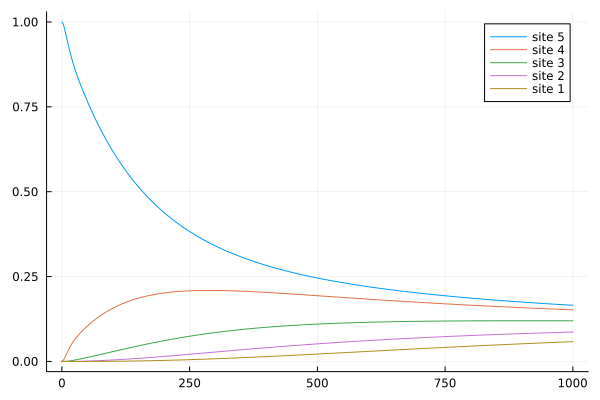

In [18]:
plot(times_HEOM.*au2fs, real.(ρs_HEOM[:, 5, 5]), label="site 5")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 4, 4]), label="site 4")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 3, 3]), label="site 3")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 2, 2]), label="site 2")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 1, 1]), label="site 1")

In [22]:
MSD_HEOM = []
for i in 1:10000
    s = 0.0
    for j in 1:N
        s += real(ρs_HEOM[i, j, j])*(j-5)^2
    end
    push!(MSD_HEOM, s)
end

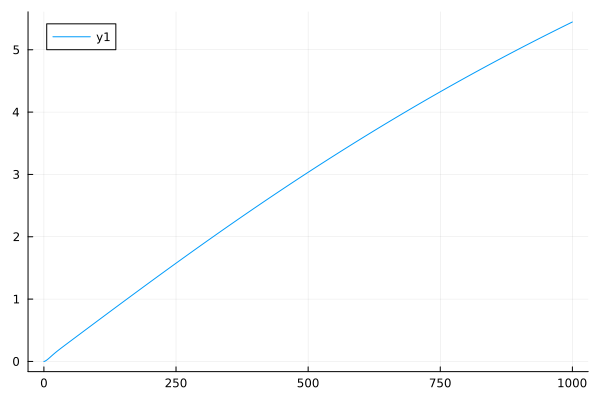

In [26]:
plot((times_HEOM[1:10000]).*au2fs, MSD_HEOM)

In [27]:
μ = (MSD_HEOM[10000] - MSD_HEOM[1])/((times_HEOM[10000] - times_HEOM[1])*au2fs)

0.005445858604110294